In [41]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize= (12,9))

# Abstract
In this lab we did some radio imaging of the sun. We looked at the sun's frequency and intensity at different elevation and azmith angles. With this we were able to create both a flux vs asmith angle and flux vs elevation angle plots, then we fitted a curve to the distribution.

# Intro
Radio waves were discovered in 1888 by Hertz. He discovered it by using an Rc circuit and emitting a spark to a reciever. In 1896 Maconi Bose sent signals via radio waves and this was used for comercial purposes. In 1932 Karl Jansky recieved extraterestrial radio interference at 14.6m(20.5MHz). A unit of flux was named a Jansky and is equal to $10^{-26}W/m^{2}/Hz$. From 1937 to 1944 an ameture astronemer named Grote Reber mapped the sky at 1.9m(160MHz) and found stong radio emmision from the Milky Way, this was called the "Cosmic Static". The fisrt 21cm line observations were done in 1951, the 21cm line is the emission line of Hydrogen.In 1963 OH line masers were found by Weaver. In 1965 the Cosmic Microwave Background was found by Penzias & Wilson which won the Nobel prize in 1978. Radio waves can penetrate the Earth's atmosphere so we are able to see many things in the radio wavelength.

# Theory
Radio is a measurment of light that is longer than visible. Radio wavelengths are able to penetrate the earths atmosphere so we are able to record it. We measure light by recording the intensity of an object over a surface area for an certain amount of time. 
$$E=\int{I_{v}\hat{n}d\vec{A}dvd\Omega{dt}}$$
Light is a wave with a length scale in $\lambda$. The energy you get from a specific angular resolution is given by $$E(\theta)=\int{\vert{E_{y}}\vert{e^{i\phi(y)}}e^{-2\pi(i)\theta\frac{y}{\lambda}}}dy$$
This is the Fouier Transform and the fourer transform of a Goausian distribution is a Gaussian distribution, trsanslate this into a 2D fouier transform and use the full width half max to find the change in the angle.
$$FWHM= \frac{\Delta{x}}{\lambda}$$
$$\Delta{\theta}=\frac{4\ln{2}\lambda}{\pi\Delta{x}}$$
This shows the inverse relationship of the size of the telescope and it's diffraction limit.

Radio is the longest wavelength of light. The brightness in Radio is given by the Black Body equation
$$B_{v}=\frac{2hv}{\lambda^{2}(e^{\frac{ky}{hT}}-1)}$$
Theres a limit to the brightness of the object you can see in the Radio, that is if $hv<<kT$ If this is true then $e^{\frac{hv}{kT}}\rightarrow 1+ \frac{hv}{kT}$ This changes the Black Body equation to
$$B_{v}=\frac{2kT_{B}}{\lambda^{2}}$$
Wich uses the number of polarzed stars in relation to the brightest temperature (this does not necessarilay have to relate to real temperature).
The Attena pattern is found using coherentdetection, Where you couple an electric feild before detecting the power.
$$\int{\hat{n}d\vec{A}}\rightarrow A_{eff}P_{N}(\Omega)$$
$$\int{P_{N}d\Omega}=\Delta{\Omega}$$
$$max(P_{N})=1$$
$$P=A_{eff}\int{I_{v}P_{N}(\Omega)dvd\Omega}$$
                                           For "small" radio sources
$$\int{I_{v}d\Omega}=F_{v}$$
                                                     so 
$$P=A_{eff}F_{v}$$
                                  The total power spectral desity in W/Hz is
$$P_{v}= \frac{hv}{e^{\frac{hv}{kT}}-1}\rightarrow kT$$
                           for thermodynamic equilibrium $P_{v}(resistor)=P_{v}(dipole)$ so 
$$kT= (\frac{kT}{\lambda^{2}})(A_{eff}\Delta{\Omega}$$
$$A_{eff}\Delta{\Omega}=\lambda^{2}$$
                                    The dipole antenna patter follows 
$$P_{N}\approx \sin{\theta}$$
$$\Delta{\Omega}= \int{P_{N}d\Omega}$$
$$A_{eff}=\frac{\lambda^{2}}{\Delta\Omega}$$
There are consequences to this, if $P=A_{eff}\int{I_{v}P_{N}(\Omega)dvd\Omega}$ and $T_{B}=\frac{A_{eff}}{\lambda^{2}}\int{T_{source}P_{N}(\Omega)d\Omega}$, the bigger the source is the smaller the beam, a big source temperature is equivilent to putting in a black body and a large telescope will not change its brightness temperature, the smaller the source the more the beam is diluted, one can increase the brightness of the temperature by making the beam smaller, or the temperature area bigger.($kT_{B}=A_{eff}F_{v}$)

Basic Radiometers follow a system. The signal is recieved, then put into an ampliflier, which is hard to do in optical, then its put through a filter, to make the signal more readable, then its put through a square law detector, $E^{2}=P$ this raises it above the negitive, lastly its averagedwhich smooths out the signal.
$$F(v)= \int{f(t)e^{2nivt}dt}$$
Radiomwter Equation:
$$P_{v}=kt_{s}[W/Hz]$$
$$\Delta{T}= \frac{T_{s}}{\sqrt{B \tau_{avg}}}$$
$$T_{s}=T_{reciever}+T_{spillover}+T_{source}$$
We treat radio photons as waves because of the bright source limit, which  if $$T_{s}=T_{source}$$ then $$SNR=\frac{T_{s}}{\Delta T_{s}}$$

# Experiment and Methodology

Below is the data being read in as lines and eavery fourth line bering read as an array then summed for each azmith angle and elevation angle.

In [42]:
with open('sun_az_m01') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
azm01 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [43]:
with open('sun_az_m03') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
g = np.array(list(line[27].split()),dtype=float)
azm03 = (a+b+c+d+e+f+g)/7
print (np.shape(line))

(28,)


In [44]:
with open('sun_az_m07') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
g = np.array(list(line[27].split()),dtype=float)
h = np.array(list(line[31].split()),dtype=float)
i = np.array(list(line[35].split()),dtype=float)
j = np.array(list(line[39].split()),dtype=float)
k = np.array(list(line[43].split()),dtype=float)
l = np.array(list(line[47].split()),dtype=float)
m = np.array(list(line[51].split()),dtype=float)
n = np.array(list(line[55].split()),dtype=float)
azm07 = (a+b+c+d+e+f+g+h+i+j+k+l+m+n)/14
print (np.shape(line))

(56,)


In [45]:
with open('sun_az_m09') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
azm09 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [46]:
with open('sun_az_p01') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
azp01 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [47]:
with open('sun_az_p03') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
azp03 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [48]:
with open('sun_az_p05') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
azp05 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [49]:
with open('sun_az_p07') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
azp07 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [50]:
with open('sun_az_p09') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
azp09 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [51]:
with open('sun_az_p11') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
azp11 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [52]:
with open('sun_el_m01') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
g = np.array(list(line[27].split()),dtype=float)
h = np.array(list(line[31].split()),dtype=float)
elm01 = (a+b+c+d+e+f+g+h)/8
print (np.shape(line))

(32,)


In [53]:
with open('sun_el_m03') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
g = np.array(list(line[27].split()),dtype=float)
elm03 = (a+b+c+d+e+f+g)/7
print (np.shape(line))

(28,)


In [54]:
with open('sun_el_m05') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
elm05 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [55]:
with open('sun_el_p01') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
g = np.array(list(line[27].split()),dtype=float)
elp01 = (a+b+c+d+e+f+g)/7
print (np.shape(line))

(28,)


In [56]:
with open('sun_el_p03') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
g = np.array(list(line[27].split()),dtype=float)
elp03 = (a+b+c+d+e+f+g)/7
print (np.shape(line))

(28,)


In [57]:
with open('sun_el_p05') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
elp05 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [58]:
with open('sun_el_p07') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
elp07 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [59]:
with open('sun_el_p09') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
elp09 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [60]:
with open('sun_el_p11') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
elp11 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [61]:
with open('sun_el_p13') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
elp13 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


In [62]:
with open('sun_el_p15') as f:
    line = f.readlines()
a = np.array(list(line[3].split()),dtype=float)
b = np.array(list(line[7].split()),dtype=float)
c = np.array(list(line[11].split()),dtype=float)
d = np.array(list(line[15].split()),dtype=float)
e = np.array(list(line[19].split()),dtype=float)
f = np.array(list(line[23].split()),dtype=float)
elp15 = (a+b+c+d+e+f)/6
print (np.shape(line))

(24,)


Below is the spectra at azmith at $-1˚$ and elevation at $3˚$ in a range where the spectra shows up.

In [63]:
freq = np.arange(1416,1426,0.009766)

(1416.25, 1425)

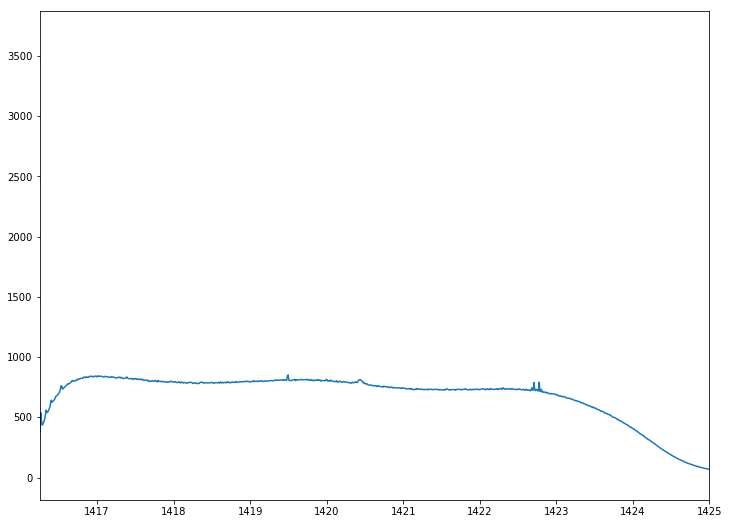

In [64]:
plt.plot(freq,azm01,label='azm01')
plt.xlim(1416.25,1425)

Below is all the azmith's spectra plotted at different degrees $+-10˚$ from the offset 

(1416.25, 1425)

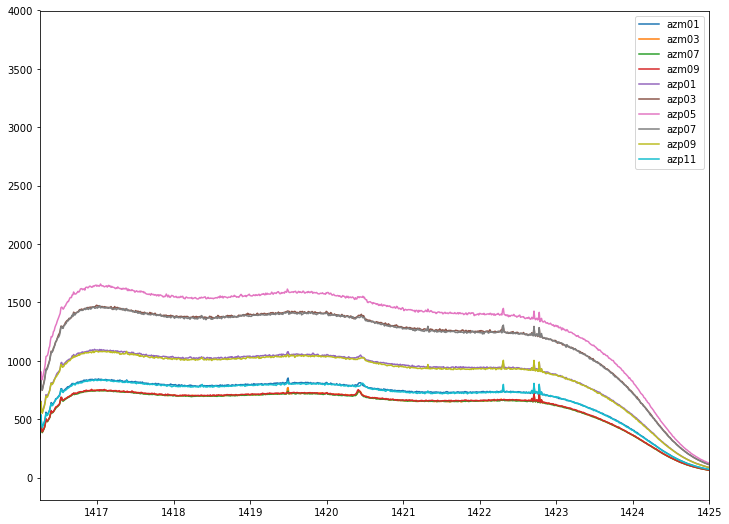

In [65]:
plt.plot(freq,azm01,label='azm01')
plt.plot(freq,azm03,label='azm03')
plt.plot(freq,azm07,label='azm07')
plt.plot(freq,azm09,label='azm09')
plt.plot(freq,azp01,label='azp01')
plt.plot(freq,azp03,label='azp03')
plt.plot(freq,azp05,label='azp05')
plt.plot(freq,azp07,label='azp07')
plt.plot(freq,azp09,label='azp09')
plt.plot(freq,azp11,label='azp11')
plt.legend()
plt.xlim(1416.25,1425)

Below is making an array for all points withing a range of frequency

In [66]:
i = np.where((freq>1417) & (freq<1424))
print (i)
print (np.shape(i))

(array([103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
       233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245,
       246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258,
       259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
       272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 2

Below is the mean for each azmith array with the restriction above put into an array to signify the flux, and the differnt degrees of the azmith from the offset put into an array to signify the offset. These are plotted against each other and fitted with a gausian fit and the Full length Half Width from thise.

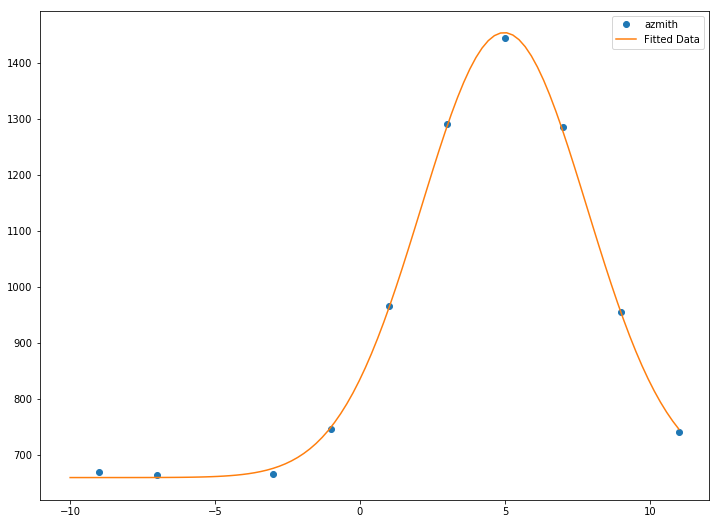

In [67]:
iflux = [azm09[i].mean(),azm07[i].mean(),azm03[i].mean(),azm01[i].mean(),azp01[i].mean(),azp03[i].mean(),azp05[i].mean(),azp07[i].mean(),azp09[i].mean(),azp11[i].mean()]
offset = [-9,-7,-3,-1,1,3,5,7,9,11]
plt.plot(offset,iflux,'o', label='azmith')
x= offset
y=iflux
x0= x
y0= y
from scipy.optimize import curve_fit
def gauss(x, *p):                                                             
        A, mu, sigma, offset = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2))+offset
p0 = [1425, 0., 5,1]
coeff, var_matrix = curve_fit(gauss, x0, y0, p0=p0)
x02 = np.linspace(-10,11,100)
data_fit = gauss(x02, *coeff)
plt.plot(x02,data_fit,label='Fitted Data')
plt.legend()

In [68]:
sigma1 = (azm09[i].mean()+azm07[i].mean()+azm03[i].mean()+azm01[i].mean()+azp01[i].mean()+azp03[i].mean()+azp05[i].mean()+azp07[i].mean()+azp09[i].mean()+azp11[i].mean())/10
print ("sigma:", sigma1)
print ("FWHM:", sigma1*2.355)

sigma: 942.482453198
FWHM: 2219.54617728


The azmith was off because we had to redo the script at the end and the offset shifted from azmith=1˚ to azmith=5˚

Below is all the azmith's and elevation's spectra plotted at different degrees $+-10˚$ from the offset 

(1416.25, 1425)

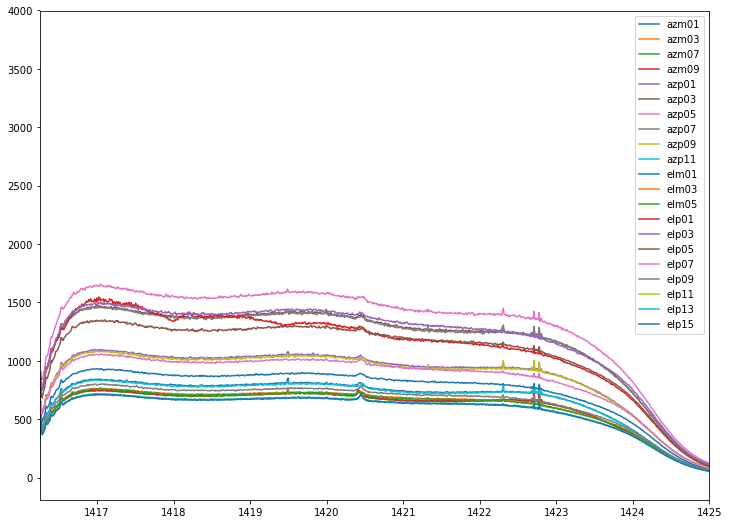

In [69]:
plt.plot(freq,azm01,label='azm01')
plt.plot(freq,azm03,label='azm03')
plt.plot(freq,azm07,label='azm07')
plt.plot(freq,azm09,label='azm09')
plt.plot(freq,azp01,label='azp01')
plt.plot(freq,azp03,label='azp03')
plt.plot(freq,azp05,label='azp05')
plt.plot(freq,azp07,label='azp07')
plt.plot(freq,azp09,label='azp09')
plt.plot(freq,azp11,label='azp11')
plt.plot(freq,elm01,label='elm01')
plt.plot(freq,elm03,label='elm03')
plt.plot(freq,elm05,label='elm05')
plt.plot(freq,elp01,label='elp01')
plt.plot(freq,elp03,label='elp03')
plt.plot(freq,elp05,label='elp05')
plt.plot(freq,elp07,label='elp07')
plt.plot(freq,elp09,label='elp09')
plt.plot(freq,elp11,label='elp11')
plt.plot(freq,elp13,label='elp13')
plt.plot(freq,elp15,label='elp15')
plt.legend()
plt.xlim(1416.25,1425)

Below is the mean for each elevation array with the restriction above put into an array to signify the flux, and the differnt degrees of the elevation from the offset put into an array to signify the offset. These are plotted against each other and fitted with a gausian fit and the Full length Half Width from thise.

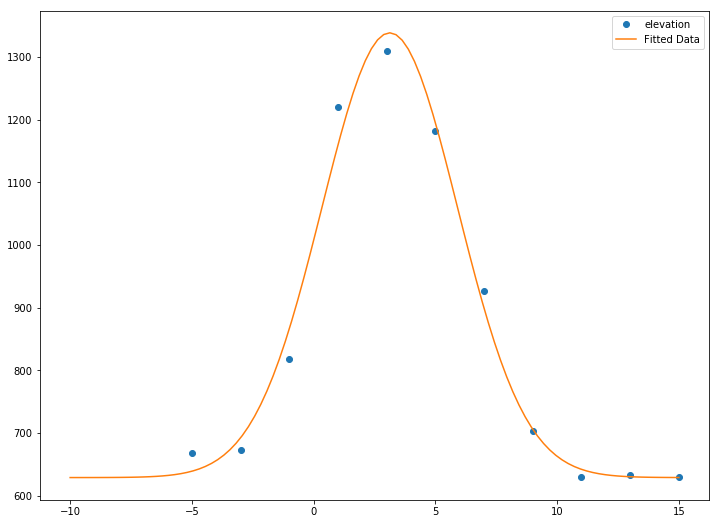

In [70]:
ifluxel = [elm05[i].mean(),elm03[i].mean(),elm01[i].mean(),elp01[i].mean(),elp03[i].mean(),elp05[i].mean(),elp07[i].mean(),elp09[i].mean(),elp11[i].mean(),elp13[i].mean(),elp15[i].mean()]
offsetel = [-5,-3,-1,1,3,5,7,9,11,13,15]
plt.plot(offsetel,ifluxel,'o',label='elevation')
#plt.plot(offset,iflux,label='azmith')
plt.legend()

x= offsetel
y=ifluxel
x0= x
y0= y
from scipy.optimize import curve_fit
def gauss(x, *p):                                                             
        A, mu, sigma, offset = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2))+offset
p0 = [1300, 0., 2.55,1]
coeff, var_matrix = curve_fit(gauss, x0, y0, p0=p0)
x02 = np.linspace(-10,15,100)
data_fit = gauss(x02, *coeff)
plt.plot(x02,data_fit,label='Fitted Data')
plt.legend()

In [71]:
sigma = (elm05[i].mean()+elm03[i].mean()+elm01[i].mean()+elp01[i].mean()+elp03[i].mean()+elp05[i].mean()+elp07[i].mean()+elp09[i].mean()+elp11[i].mean()+elp13[i].mean()+elp15[i].mean())/11
print ("sigma:", sigma)
print ("FWHM:", sigma*2.355)


sigma: 854.319307673
FWHM: 2011.92196957


# Summary
We took radio data on the sun and used that to find the angular resolution of the SRT. We used the SRT telescope on the topof Angell Hall. First we found the offset of the sun by recording a 10 second observation of the sun's center and taking the off set from that, which was 1˚,3˚ for us. Then one of us repeated this over at the different elevation angles recorded above, that are from -5˚ to 15˚ at 10 second for each angle. While one person did that another wrote a script to do the same thing with the azmith angles, but going from -9˚ to 11˚. That was the data we got for this lab

After we collected data we started on the analysis part. I read in the data as lines and read eavery 4th line in as an array then averaged it for each azmith and elevation angle. I ploted the spectra of these different angles in a frwquency vrsintensity plot. Then I set a frequency range and restricted the arrays by this range then got the mean of those to make an array for the different angles of azmith and elevation angles, to make them into flux. I then plotted the azmith angles flux vs the different offset angles and found the full width half max, and did the same with the elevation angles.

# Conclusion
We collected and got data from the sun using the SRT. We analyzed this data by averaging it, plotting thhe spectra, converting the frequencies into flux, plotting the distibution of the angles with the flux and fitting a curve and with that we were able to find the full width half max. 